In [1187]:
import pandas as pd

!pip3 install catboost
from catboost import CatBoostRegressor


In [1188]:
# population get
Population_file_path = 'Distance.xlsx'
population = pd.read_excel(Population_file_path, sheet_name='Population_quart')
population = list(population.Population)

number_of_quarts = len(population)

In [1189]:
# distance get
Distance_file_path = 'Distance.xlsx'
distance = pd.read_excel(Distance_file_path, sheet_name='Distance_from_quart', index_col='Id')

distance_from_market = {}
ids = []
for Id in distance.columns:
    distance_from_market[Id] = list(distance[Id])
    ids.append(Id)

In [1190]:
# market data get

Markets_file_path = 'Market_data_changed3.xlsx'
market_data = pd.read_excel(Markets_file_path, index_col='Full_Address')

Coord_file_path = 'Coord.xlsx'
coord = pd.read_excel(Coord_file_path, index_col='Full_Address')

market_data = market_data.join(coord)

market_data = market_data.reset_index()
market_data.head()

,Full_Address,Type,Square,Categorical_Brand,Traffic,Time,Building_Type,Frequency,Id,lat,lon
0,1 Капитанская ул. Санкт-Петербург,супермаркет,628.0,Пятерочка,33652,31,жилой дом,1085.548387,235,30.215445,59.955417
1,1 Новосмоленская набережная Санкт-Петербург,магазин,126.0,Другие,4586,51,жилой дом,89.921569,118,30.230887,59.949145
2,1 Новосмоленская набережная Санкт-Петербург,магазин,137.0,Другие,7417,31,жилой дом,239.258065,118,30.230887,59.949145
3,10 Среднегаванский проспект Санкт-Петербург,магазин,232.0,Другие,8791,30,жилой дом,293.033333,150,30.244919,59.930449
4,100 Средний проспект В.О. Санкт-Петербург,лавка,20.0,Другие,4098,31,жилой дом,132.193548,152,30.241092,59.931648


In [1191]:
# square get

square_of_market = []
for row in market_data.iterrows():
    square_of_market.append({'Id': row[1]['Id'], 'Square': row[1]['Square']})

number_of_markets = len(square_of_market)

square_of_market

[{'Id': 235, 'Square': 628.0},
 {'Id': 118, 'Square': 126.0},
 {'Id': 118, 'Square': 137.0},
 {'Id': 150, 'Square': 232.0},
 {'Id': 152, 'Square': 20.0},
 {'Id': 152, 'Square': 131.0},
 {'Id': 138, 'Square': 295.0},
 {'Id': 249, 'Square': 255.0},
 {'Id': 120, 'Square': 253.7},
 {'Id': 122, 'Square': 251.0},
 {'Id': 133, 'Square': 410.0},
 {'Id': 159, 'Square': 839.0},
 {'Id': 27, 'Square': 221.0},
 {'Id': 202, 'Square': 418.0},
 {'Id': 143, 'Square': 129.0},
 {'Id': 84, 'Square': 238.0},
 {'Id': 84, 'Square': 103.0},
 {'Id': 84, 'Square': 20.0},
 {'Id': 237, 'Square': 430.0},
 {'Id': 243, 'Square': 955.0},
 {'Id': 256, 'Square': 188.0},
 {'Id': 224, 'Square': 951.0},
 {'Id': 44, 'Square': 86.0},
 {'Id': 130, 'Square': 242.0},
 {'Id': 222, 'Square': 569.0},
 {'Id': 23, 'Square': 216.0},
 {'Id': 196, 'Square': 175.0},
 {'Id': 297, 'Square': 699.0},
 {'Id': 220, 'Square': 634.0},
 {'Id': 203, 'Square': 517.0},
 {'Id': 183, 'Square': 935.0},
 {'Id': 258, 'Square': 158.0},
 {'Id': 201, 'Squ

In [1192]:
# Huff gravity model

# i - number of quart, j- number of market
def huff_probability(i, j, lmbd=0.1):
    Id = square_of_market[j]['Id']
    s_t = square_of_market[j]['Square'] / distance_from_market[Id][i] ** lmbd

    sum_s_t = 0

    for market in square_of_market:
        sum_s_t += market['Square'] / distance_from_market[market['Id']][i] ** lmbd

    print(s_t/sum_s_t)

    return s_t / sum_s_t


huff_pred_by_market = []

for j in range(number_of_markets):
    byuers_count = 0
    for i in range(number_of_quarts):
        prob = huff_probability(i, j)
        byuers_count += prob * population[i]
    huff_pred_by_market.append(byuers_count)

0.011894905202126637
0.01208300519655051
0.014676858047779372
0.011859914468424871
0.01176381780690874
0.0116360046856207
0.011557742383443795
0.011725847765013713
0.011840345641991242
0.011697948200187363
0.012415584232754595
0.012328106267066074
0.011875318763886443
0.014984967690363343
0.012523867779518095
0.011744913026782539
0.012008585201346025
0.012755886237848502
0.013908737915956261
0.011699037389756781
0.011802899140298796
0.011983252473505103
0.012706804731651663
0.014094502869903675
0.01166298697816474
0.012924526310516429
0.011964790744816189
0.011732378806272667
0.012091823048145054
0.011848147861342183
0.013564567461727498
0.011876274062732846
0.011683981727490448
0.012272523036428952
0.012087144933019702
0.01210834596037365
0.01169248123164685
0.013220852537364188
0.011915984268469728
0.011822361557003018
0.011618832372031157
0.011674595933939182
0.011883790578011614
0.015382487714581576
0.012288278866893347
0.01179524326639782
0.011663697410979305
0.012905412501768836


In [1193]:
# Huff insertion in DataFrame

market_data.insert(0, 'Huff', huff_pred_by_market)
market_data.head()

,Huff,Full_Address,Type,Square,Categorical_Brand,Traffic,Time,Building_Type,Frequency,Id,lat,lon
0,3104.112486,1 Капитанская ул. Санкт-Петербург,супермаркет,628.0,Пятерочка,33652,31,жилой дом,1085.548387,235,30.215445,59.955417
1,635.376431,1 Новосмоленская набережная Санкт-Петербург,магазин,126.0,Другие,4586,51,жилой дом,89.921569,118,30.230887,59.949145
2,690.845802,1 Новосмоленская набережная Санкт-Петербург,магазин,137.0,Другие,7417,31,жилой дом,239.258065,118,30.230887,59.949145
3,1137.841836,10 Среднегаванский проспект Санкт-Петербург,магазин,232.0,Другие,8791,30,жилой дом,293.033333,150,30.244919,59.930449
4,98.691336,100 Средний проспект В.О. Санкт-Петербург,лавка,20.0,Другие,4098,31,жилой дом,132.193548,152,30.241092,59.931648


In [1194]:
# Features and Target

X = market_data
y = market_data['Frequency']
X = X.drop(['Frequency'], axis=1)

X = X.drop(['Full_Address'], axis=1)
#X = X.drop(['Square'], axis=1)
# = X.drop(['Huff'], axis=1)
X = X.drop(['Traffic'], axis=1)
X = X.drop(['Time'], axis=1)
X = X.drop(['Id'], axis=1)
X = X.drop(['lat'], axis=1)
X = X.drop(['lon'], axis=1)
#X = X.drop(['Type'], axis=1)
#X = X.drop(['Categorical_Brand'], axis=1)
#X = X.drop(['Building_Type'], axis=1)


categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

X.head()

,Huff,Type,Square,Categorical_Brand,Building_Type
0,3104.112486,супермаркет,628.0,Пятерочка,жилой дом
1,635.376431,магазин,126.0,Другие,жилой дом
2,690.845802,магазин,137.0,Другие,жилой дом
3,1137.841836,магазин,232.0,Другие,жилой дом
4,98.691336,лавка,20.0,Другие,жилой дом


In [1195]:
# setting up cross_validation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score


def get_score(model):
    numerical_transformer = SimpleImputer(strategy='constant')
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    cross_val_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = -1 * cross_val_score(cross_val_pipeline, X, y, cv=25, scoring='neg_mean_absolute_percentage_error')
    return scores.mean()

In [1196]:
# testing different models

In [1197]:
from xgboost import XGBRegressor

model_grad = XGBRegressor(max_depth=15, n_estimators=100, learning_rate=0.04,  random_state=44)
get_score(model_grad)

0.5643999869053625

In [1198]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(n_estimators = 14, random_state=44)
get_score(model_forest)

0.552736534560389

In [1199]:
from sklearn.linear_model import LinearRegression

model_line = LinearRegression()
get_score(model_line)

0.5435236812548228

In [1200]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
get_score(model_ridge)

0.5742099421668808

In [1201]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
get_score(model_lasso)

C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226970.493100944, tolerance: 1963.018037356931
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3143443.7889839783, tolerance: 1908.8013870274544
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3143005.1767195007, tolerance: 1984.6402528541842
  model = cd_fast.sparse_enet_coordinate_des

0.5369007772003349

In [1202]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()
get_score(model_elastic)

C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5939643.714731635, tolerance: 1963.018037356931
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5637932.524257456, tolerance: 1908.8013870274544
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5807529.183384494, tolerance: 1984.6402528541842
  model = cd_fast.sparse_enet_coordinate_desce

0.8047698913250089

In [1203]:
from sklearn.model_selection import train_test_split

Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=4)

In [1204]:
model_catboost = CatBoostRegressor(depth = 9, num_trees = 100, learning_rate = 0.5, eval_metric='MAPE')
model_catboost.fit(Xgb_train, ygb_train, cat_features=categorical_cols, eval_set=(Xgb_test, ygb_test))

0:	learn: 1.0547477	test: 0.9761978	best: 0.9761978 (0)	total: 13ms	remaining: 1.29s
1:	learn: 0.8553204	test: 0.7515341	best: 0.7515341 (1)	total: 57.9ms	remaining: 2.84s
2:	learn: 0.6967359	test: 0.6480349	best: 0.6480349 (2)	total: 140ms	remaining: 4.54s
3:	learn: 0.6306061	test: 0.5869113	best: 0.5869113 (3)	total: 156ms	remaining: 3.73s
4:	learn: 0.5823791	test: 0.5495246	best: 0.5495246 (4)	total: 168ms	remaining: 3.2s
5:	learn: 0.5237323	test: 0.4975178	best: 0.4975178 (5)	total: 185ms	remaining: 2.9s
6:	learn: 0.4857961	test: 0.4781750	best: 0.4781750 (6)	total: 220ms	remaining: 2.92s
7:	learn: 0.4782048	test: 0.4692222	best: 0.4692222 (7)	total: 235ms	remaining: 2.7s
8:	learn: 0.4545172	test: 0.4634460	best: 0.4634460 (8)	total: 271ms	remaining: 2.74s
9:	learn: 0.4535364	test: 0.4706302	best: 0.4634460 (8)	total: 286ms	remaining: 2.57s
10:	learn: 0.4481457	test: 0.4752642	best: 0.4634460 (8)	total: 319ms	remaining: 2.58s
11:	learn: 0.4442593	test: 0.5030126	best: 0.4634460 (8)

In [1205]:
from sklearn.metrics import mean_absolute_percentage_error


Y_predict = model_catboost.predict(X)
Y_pred = model_catboost.predict(Xgb_test)
print(mean_absolute_percentage_error(y, Y_predict))
print(mean_absolute_percentage_error(ygb_test, Y_pred))

0.3840855321259085
0.45924122400240647


In [1206]:
X = pd.get_dummies(X, columns=categorical_cols)

In [1207]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=4)

In [1208]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [1209]:
def compare_valid(m_model):
    m_model.fit(X_train, y_train)
    m_predictions = m_model.predict(X_valid)

    fig1 = plt.figure(figsize=(12, 5))
    fig2 = plt.figure(figsize=(7,6))


    ax2 = fig1.add_subplot(111)
    ax = fig2.add_subplot(211)



    ax.plot(list(i for i in range(len(y_valid))), list(y_valid))
    ax.plot(list(i for i in range(len(y_valid))), list(m_predictions))

    ax2.plot(list(i for i in range(len(y))), list(y))
    ax2.plot(list(i for i in range(len(y))), list(m_model.predict(X)))

    plt.show()

    print(mean_absolute_percentage_error(y_valid, m_predictions))
    print('all data:',mean_absolute_percentage_error(y, m_model.predict(X)))

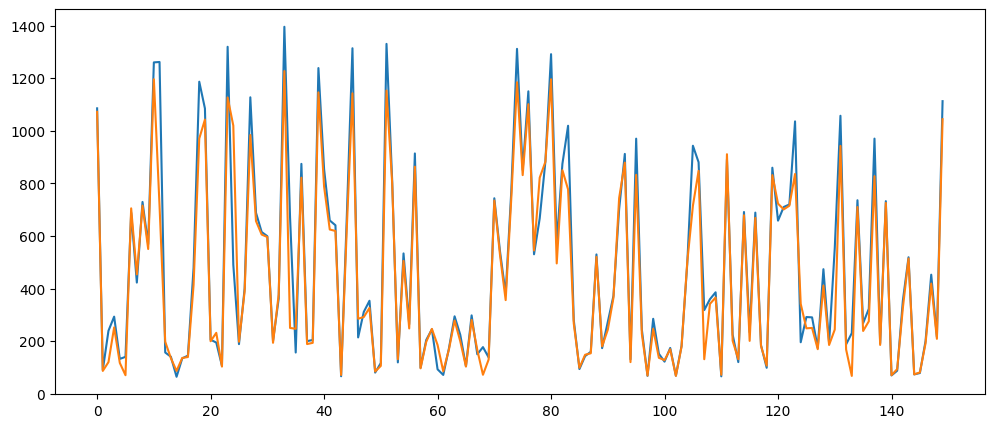

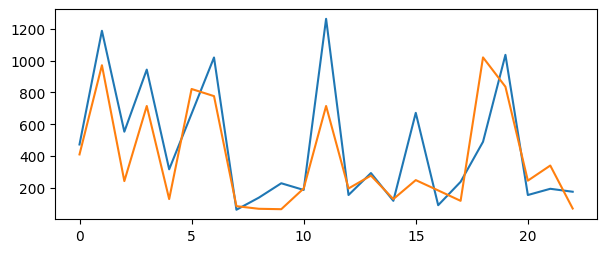

0.43187858014187497
all data: 0.11846553144761607


In [1210]:
compare_valid(model_grad)

0:	learn: 1.0097126	total: 3.11ms	remaining: 308ms
1:	learn: 0.7375489	total: 4.01ms	remaining: 196ms
2:	learn: 0.6194872	total: 4.59ms	remaining: 148ms
3:	learn: 0.5620841	total: 7.21ms	remaining: 173ms
4:	learn: 0.5188507	total: 9.92ms	remaining: 189ms
5:	learn: 0.4792994	total: 12.5ms	remaining: 196ms
6:	learn: 0.4543696	total: 14.2ms	remaining: 189ms
7:	learn: 0.4294417	total: 17ms	remaining: 195ms
8:	learn: 0.4166190	total: 19.3ms	remaining: 195ms
9:	learn: 0.4088624	total: 22.3ms	remaining: 201ms
10:	learn: 0.3943054	total: 24ms	remaining: 194ms
11:	learn: 0.3923303	total: 25.1ms	remaining: 184ms
12:	learn: 0.3821364	total: 27.7ms	remaining: 186ms
13:	learn: 0.3816076	total: 30.5ms	remaining: 187ms
14:	learn: 0.3606552	total: 33.3ms	remaining: 189ms
15:	learn: 0.3461679	total: 37.4ms	remaining: 196ms
16:	learn: 0.3362681	total: 40.5ms	remaining: 198ms
17:	learn: 0.3270211	total: 43.1ms	remaining: 196ms
18:	learn: 0.3180009	total: 45.9ms	remaining: 196ms
19:	learn: 0.3112579	total

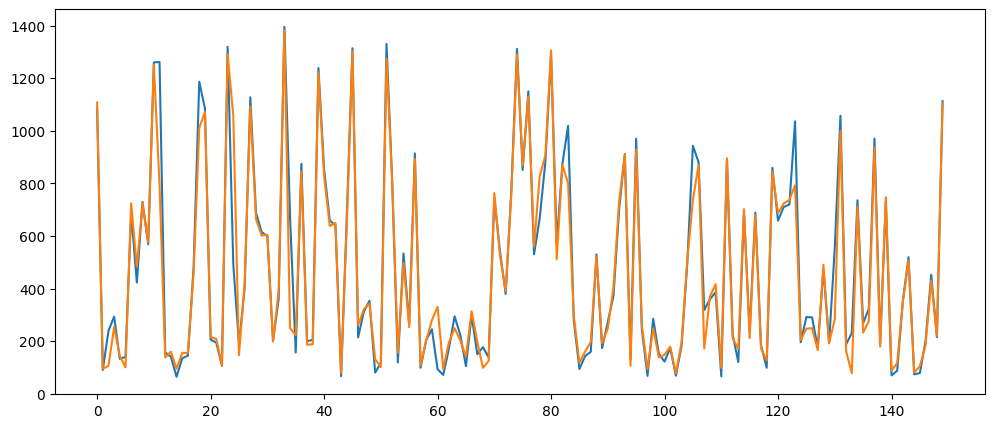

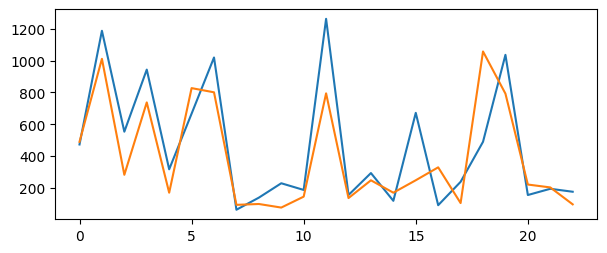

0.4599388052072591
all data: 0.14521487875754582


In [1211]:
compare_valid(model_catboost)

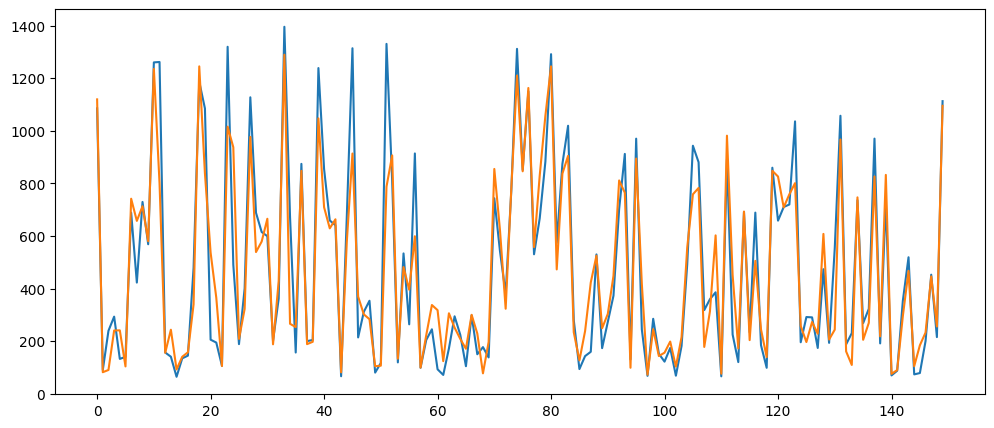

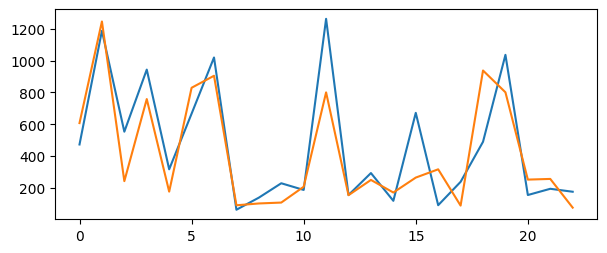

0.4548521359528447
all data: 0.27078650765827555


In [1212]:
compare_valid(model_forest)

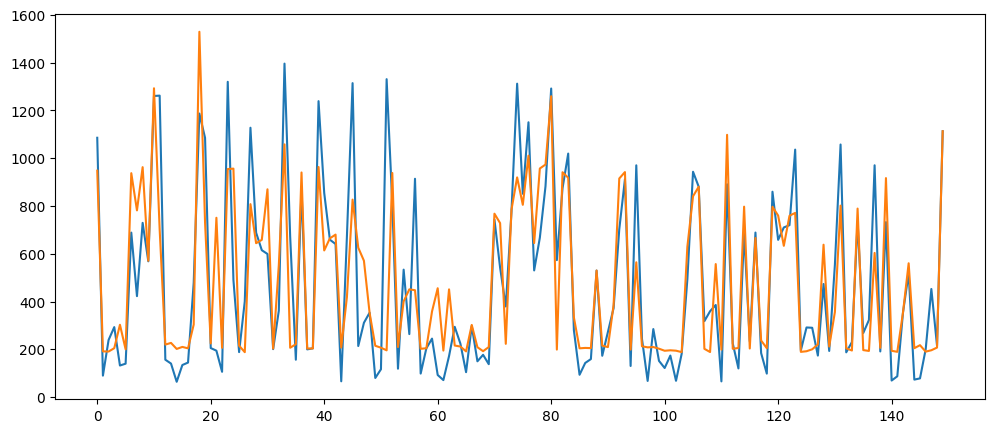

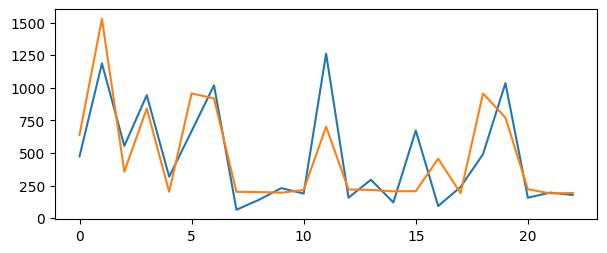

0.5760624679575878
all data: 0.48230486990412014


In [1213]:
compare_valid(model_line)

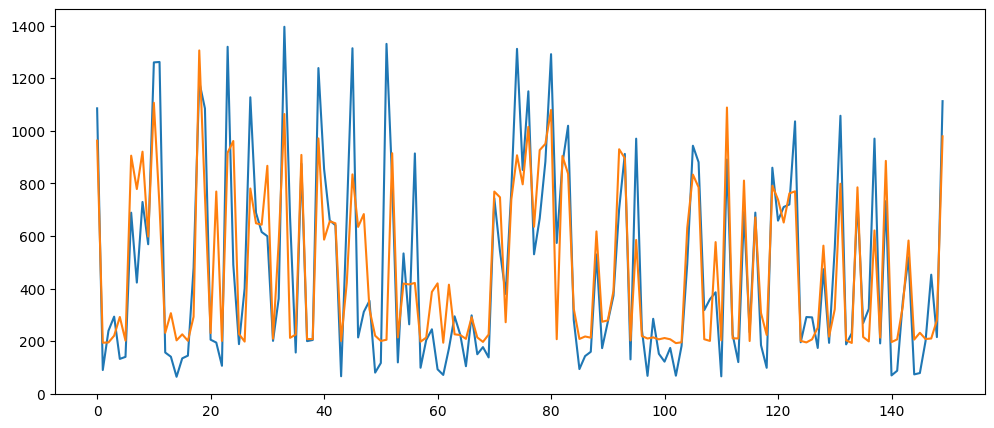

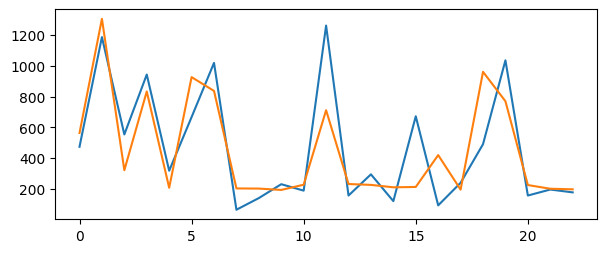

0.5565700025474272
all data: 0.501772287204479


In [1214]:
compare_valid(model_ridge)

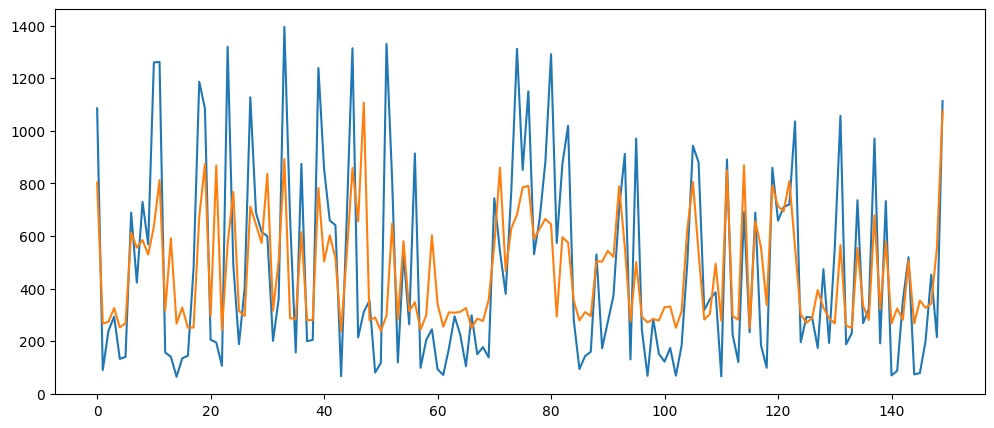

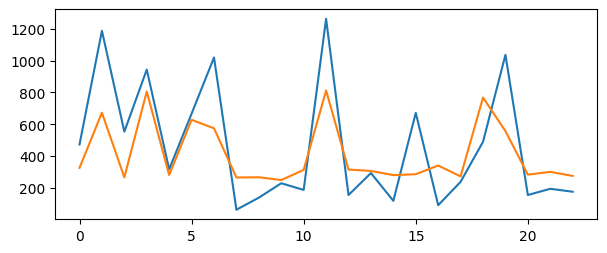

0.6935418900895507
all data: 0.7727840524258646


In [1215]:
compare_valid(model_elastic)

C:\Users\chesn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.857e+06, tolerance: 1.726e+03
  model = cd_fast.enet_coordinate_descent(


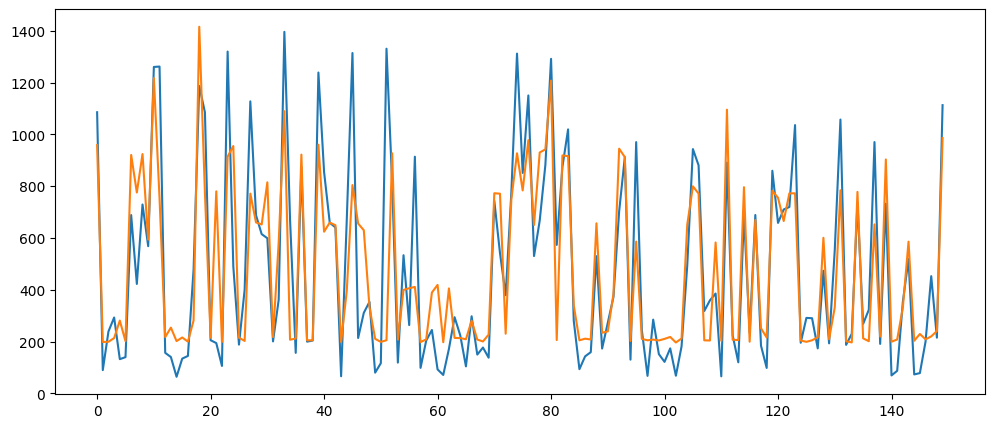

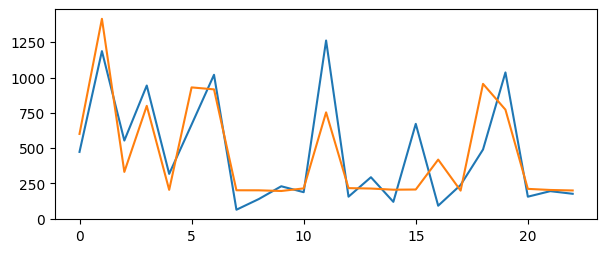

0.549212595978592
all data: 0.4916349310517886


In [1216]:
compare_valid(model_lasso)